In [49]:
!pip install openpyxl

In [50]:
import pandas as pd
from matplotlib import pyplot as plt

In [51]:
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip

--2025-05-02 09:24:43--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip.1’

online+retail.zip.1     [    <=>             ]  22.62M  34.7MB/s    in 0.7s    

2025-05-02 09:24:44 (34.7 MB/s) - ‘online+retail.zip.1’ saved [23715478]



In [52]:
!unzip online+retail.zip

Archive:  online+retail.zip
replace Online Retail.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [53]:
df1= pd.read_excel('Online Retail.xlsx',dtype={'InvoiceNo':'string','StockCode':'string','Description':'string','Country':'string'})
df1.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 33.1 MB


In [55]:
df1.shape

(541909, 8)

### Data cleaning: Handling missing values


In [56]:
# checking for any null values
df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [57]:
#some examples of the null values in description
df1[df1['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [58]:
# We are checking if this stockcode have any data with description
df1[df1.StockCode=='22139']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01 09:41:00,4.25,15311.0,United Kingdom
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.00,NaN,United Kingdom
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,2010-12-03 14:27:00,11.02,NaN,United Kingdom
7203,537011,22139,<NA>,-5,2010-12-03 15:38:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
538411,581405,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 13:50:00,4.95,13521.0,United Kingdom
539531,581439,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 16:30:00,10.79,NaN,United Kingdom
540441,581486,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,2011-12-09 09:38:00,4.95,17001.0,United Kingdom
541387,581498,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [59]:
# mode gives us most occuring value in a column, this case we  have choosen description
df1[df1.StockCode=='22139'].Description.mode()

,Description
0,RETROSPOT TEA SET CERAMIC 11 PC


In [60]:
#couting the values  in stockcode and description and storing in most_freq variable
most_freq= df1[['StockCode','Description']].value_counts().reset_index()
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,21491,SET OF THREE VINTAGE GIFT WRAPS,1
4788,84876D,damaged,1
4789,20827,damages,1
4790,20832,check,1


In [61]:
#it gives us the most freq stockcode description for the given stock code 85123A
most_freq[most_freq.StockCode=='85123A'].head(1)

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302


In [62]:
#it groups the stockcode with same number and only takes the 1st description of the stock code as from the head
most_freq= most_freq.groupby("StockCode").head(1)
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4755,37503,TEA TIME CAKE STAND IN GIFT BOX,1
4773,37461,FUNKY MONKEY MUG,1
4775,37474,SET/4 2 TONE EGG SHAPE MIXING BOWLS,1
4782,22145,CHRISTMAS CRAFT HEART STOCKING,1


In [63]:
#now we name the most_freq columns into another name
most_freq.columns= ['StockCode','freq_description','count']
#merging the df1 and most_freq where they are merged on basis of Stock code
#now the stockcode only has the single description which is freq_description
df2 = df1.merge(most_freq,on='StockCode',how='left')
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0


In [64]:
#description values is being replaced with freq description values
df2['Description']= df2['freq_description']
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0


In [65]:
#we can see it still  has some null values in description
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,112
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
freq_description,112
count,112


In [66]:
#now we drop all the null values that are in the description,
#inplace means that the df2 will have the change without assigning it
df2.dropna(subset=['Description'],inplace=True)
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,134968
Country,0
freq_description,0
count,0


In [67]:
df2.drop(columns=['freq_description','count'],inplace=True)
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [68]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541797.000000,541797,541797.000000,406829.000000
mean,9.555919,2011-07-04 14:06:48.671255296,4.612067,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:36:00,1.250000,13953.000000
50%,3.000000,2011-07-20 08:59:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:41:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.103428,NaN,96.769831,1713.600303


### Now we are going to handle negative value in quantity and unit price  

In [69]:
#value having zero quantity and unit price
df2[df2.Quantity<0]
df2[df2.UnitPrice<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [70]:
df3= df2[(df2.UnitPrice>0) & (df2.Quantity>0)]
df3.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


In [71]:
#Meaning 99% of the quantities are less than or equal to 100
#It returns the 99th percentile (0.99 quantile) of the Quantity column in df3
df3.Quantity.quantile(0.99)

np.float64(100.0)

In [72]:
df3[df3['Quantity']>1500].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom
25920,538420,17096,ASSORTED LAQUERED INCENSE HOLDERS,1728,2010-12-12 12:03:00,0.17,12875.0,United Kingdom
32671,539101,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2010-12-16 10:35:00,0.94,16029.0,United Kingdom
52709,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-01-11 12:55:00,2.55,15749.0,United Kingdom


###  Feature Engineering: Create new columns

In [73]:
#we are making a copy and putting total sales in that dataframe
df4= df3.copy()
df4['TotalSales']= df4['Quantity'] * df4['UnitPrice']
df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [74]:
# month column created using dt accessor
df4['Month']= df4['InvoiceDate'].dt.month
df4.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
541007,581492,22758,LARGE PURPLE BABUSHKA NOTEBOOK,2,2011-12-09 10:03:00,2.46,NaN,United Kingdom,4.92,12
76718,542646,21121,SET/10 RED POLKADOT PARTY CANDLES,6,2011-01-31 11:42:00,1.25,17220.0,United Kingdom,7.50,1
502083,578834,85066,CREAM SWEETHEART MINI CHEST,8,2011-11-25 15:32:00,12.75,18109.0,United Kingdom,102.00,11
65174,541695,21385,IVORY HANGING DECORATION HEART,4,2011-01-20 18:01:00,1.63,NaN,United Kingdom,6.52,1
195611,553727,47590A,BLUE HAPPY BIRTHDAY BUNTING,3,2011-05-18 16:56:00,5.45,13531.0,United Kingdom,16.35,5


### Visualization and EDA


##### 1. Plot monthly sales

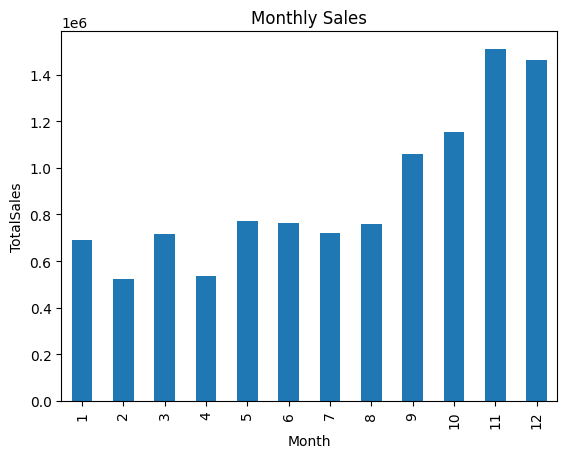

In [75]:
monthly_sales = df4.groupby('Month') ['TotalSales'].sum()
monthly_sales.plot(kind='bar',title ='Monthly Sales')
plt.xlabel("Month")
plt.ylabel('TotalSales')
plt.show()

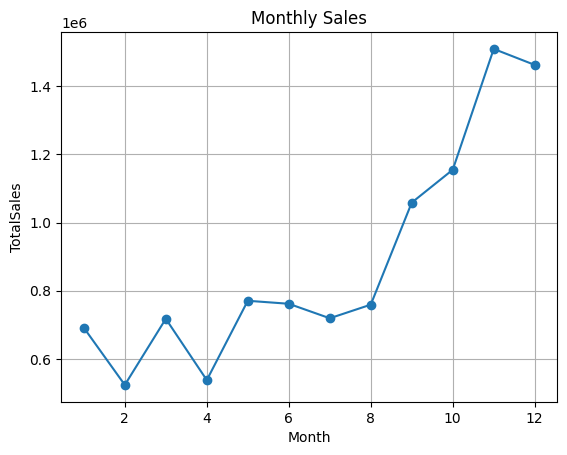

In [76]:
#We can also make line chart without marker='o'
#marker='o' is saying make a circle at each month for better visibility
monthly_sales = df4.groupby('Month') ['TotalSales'].sum()
monthly_sales.plot(kind='line',title ='Monthly Sales',marker='o')
plt.xlabel("Month")
plt.ylabel('TotalSales')
plt.grid()
plt.show()

**Insights **
Total sales started rising up in August having a peek in november. this is likely deu to holiday season at the end of the year

##### 2.Top 5 countries by Sales

In [77]:
#Top5 countries having maximum sales
top_5_countries= df4.groupby('Country') ['TotalSales'].sum().sort_values(ascending=False).head(5)
top_5_countries

,TotalSales
Country,
United Kingdom,9025222.084
Netherlands,285446.340
EIRE,283453.960
Germany,228867.140
France,209715.110


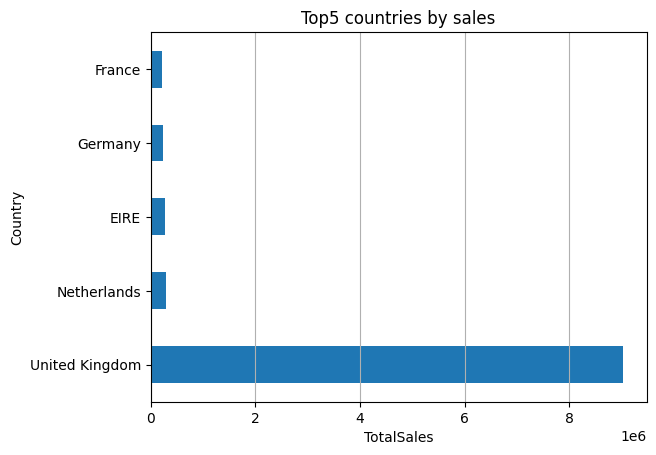

In [78]:
top_5_countries.plot(kind='barh',title='Top5 countries by sales')
plt.xlabel('TotalSales')
plt.ylabel('Country')
plt.grid(axis='x')
plt.show()

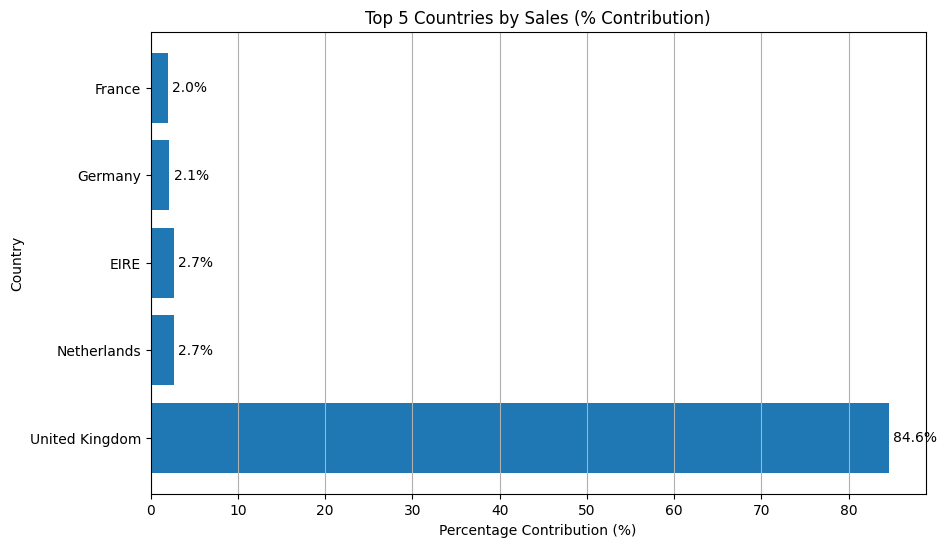

In [79]:
country_wise_sales= df4.groupby('Country')['TotalSales'].sum()
total_sales = country_wise_sales.sum()
percentage_contributions= (country_wise_sales/total_sales)*100


top_5_countries = df4.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(5)
percentages= (top_5_countries/total_sales) *100

plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
bars = plt.barh(top_5_countries.index, percentages)
plt.title('Top 5 Countries by Sales (% Contribution)')
plt.xlabel('Percentage Contribution (%)')
plt.ylabel('Country')
plt.grid(axis='x')

# Add percentage labels on the bars
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, f'{percentage:.1f}%', va='center', ha='left')

plt.show()


** Insights **

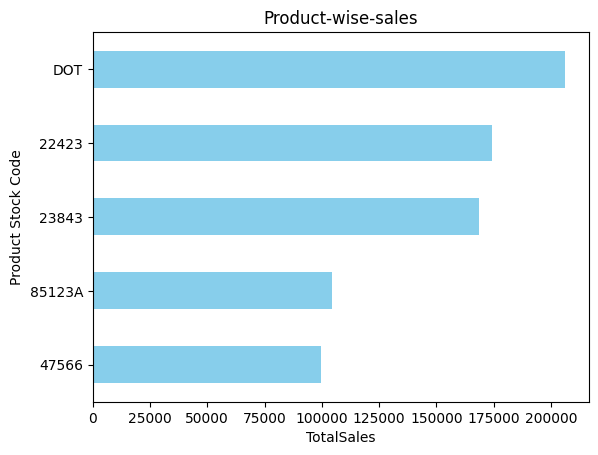

In [80]:
product_wise_sales= df4.groupby('StockCode') ['TotalSales'].sum()

top_5_products= product_wise_sales.sort_values(ascending=False).head(5)
top_5_products.plot(kind='barh',title='Product-wise-sales',color='skyblue')
plt.xlabel('TotalSales')
plt.ylabel('Product Stock Code')
plt.gca().invert_yaxis()       #To show the highest sales at the top
plt.show()

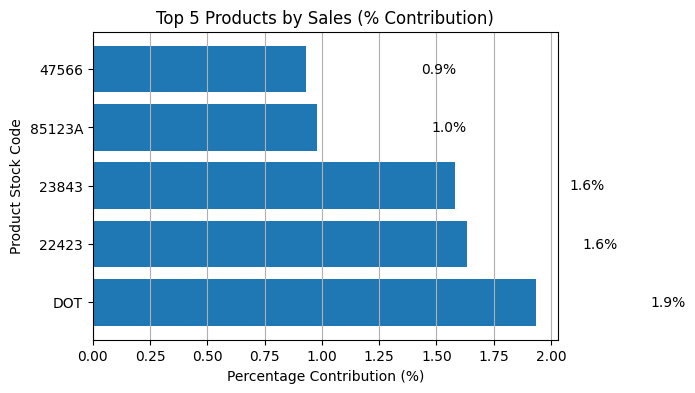

In [81]:
# prompt: Plot same chart as above but use percentage wise for the stockcode with total sales


total_sales = df4['TotalSales'].sum()
percentage_contributions = (df4.groupby('StockCode')['TotalSales'].sum() / total_sales) * 100
#This gives us product name and its percentage contribution
top_5_products = percentage_contributions.sort_values(ascending=False).head(5)

plt.figure(figsize=(6, 4))
bars = plt.barh(top_5_products.index, top_5_products.values)
plt.title('Top 5 Products by Sales (% Contribution)')
plt.xlabel('Percentage Contribution (%)')
plt.ylabel('Product Stock Code')
plt.grid(axis='x')

for bar, percentage in zip(bars, top_5_products.values):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, f'{percentage:.1f}%', va='center', ha='left')

plt.show()


##### 4. RFM Analysis (Recency, Frequency and Monetary)

In [82]:
current_dt= df4['InvoiceDate'].max()+ pd.Timedelta(days=1)
current_dt

Timestamp('2011-12-10 12:50:00')

In [83]:
"""Xmax gives us the latest date of the customer which will be the order date and we subtract by
current date and it will give us the days customer purchased"""
#Number of invoices by the customer is number of sales customer has done
#sum of the total sales by a customer


rfm = df4.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_dt-x.max()).days,   #recency
    'InvoiceNo': 'count',                                 #Frequency
    'TotalSales': 'sum'                                   #Monetary
})

rfm.columns=['Recency','Frequency','Monetary']
rfm.head(5)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [84]:
#Rechecking the value given above. It's true guys.
df4[df4.CustomerID==12346]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6,1


In [85]:
#Segment customer based on RFM
#This qcut divides the column into 4 equal sized quantile and labels them
rfm['R_Segment'] =pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])
rfm['F_Segment']= pd.qcut(rfm['Frequency'],4,labels=[1,2,3,4])
rfm['M_Segment']= pd.qcut(rfm['Monetary'],4,labels=[1,2,3,4])
#This takes the score of all three and sums up in rows i.e.per customer
rfm['RFM_Score'] =rfm[['R_Segment',"F_Segment","M_Segment"]].sum(axis=1)
rfm

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,4,6
12347.0,2,182,4310.00,4,4,4,12
12348.0,75,31,1797.24,2,2,4,8
12349.0,19,73,1757.55,3,3,4,10
12350.0,310,17,334.40,1,1,2,4
...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,3
18281.0,181,7,80.82,1,1,1,3
18282.0,8,12,178.05,4,1,1,6


In [86]:
#customer with highest rfm score
rfm.sort_values('RFM_Score',ascending=False)

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
18283.0,4,756,2094.88,4,4,4,12
18245.0,7,175,2567.06,4,4,4,12
18241.0,10,104,2073.09,4,4,4,12
18229.0,12,164,7276.90,4,4,4,12
18225.0,3,271,5509.12,4,4,4,12
...,...,...,...,...,...,...,...
16471.0,275,13,223.95,1,1,1,3
18224.0,264,10,158.95,1,1,1,3
18220.0,227,2,305.28,1,1,1,3


#### 5. Customer Churn Analysis

In [87]:
df4.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


In [88]:
#Create a basket matrix for association rule mining
customer_last_purchase = df4.groupby('CustomerID')['InvoiceDate'].max()
customer_last_purchase.head(5)

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:01:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00


In [89]:
# these are the recency values
customer_last_purchase= (current_dt -customer_last_purchase).dt.days
customer_last_purchase.head(5)

,InvoiceDate
CustomerID,
12346.0,326
12347.0,2
12348.0,75
12349.0,19
12350.0,310


In [90]:
#Define churn threshold (e.g., 90 days without purchase)

churn_threshlod= 90
churned_customers= customer_last_purchase[customer_last_purchase>churn_threshlod]
churned_customers.head(5)

,InvoiceDate
CustomerID,
12346.0,326
12350.0,310
12353.0,204
12354.0,232
12355.0,214


Number of churned cutomers: 1449


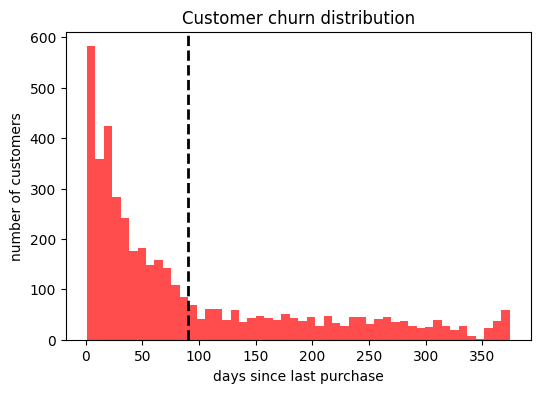

In [91]:
print(f'Number of churned cutomers: {len(churned_customers)}')
plt.figure(figsize=(6, 4))
plt.hist(customer_last_purchase, bins =50, color='red', alpha =0.7)
plt.axvline(churn_threshlod, color= 'black', linestyle= 'dashed', linewidth  =2)
plt.title("Customer churn distribution")
plt.xlabel('days since last purchase')
plt.ylabel('number of customers')
plt.show()

#### Customer without any Customer ID

In [112]:
a=df4['CustomerID'].isnull().sum().astype(int)
b=df4['CustomerID'].notna().sum().astype(int)
total = a+b
print((a/total)*100)

24.942275478019408


** Insights ** Around 24% of customers are not in the database. Personalized marketing cannot be done and RFM and Churn Analysis which we are seeing doesnot have the correct data.